# Introduction

1. **STROKE**, sometimes called a brain attack, occurs when something blocks blood supply to part of the brain or when a blood vessel in the brain bursts. In either case, parts of the brain become damaged or die in minutes. A stroke can cause lasting brain damage, long-term disability, or even death, [more about stroke here](https://www.cdc.gov/stroke/about.htm).
2. **Types of stroke**:
* Ischaemic strokes - happen when a blood clot blocks the flow of blood and oxygen to the brain. These blood clots typically form in areas where the arteries have been narrowed or blocked over time by fatty deposits known as plaques. This process is known as atherosclerosis.
* Hemorrhagic stroke - occurs when a blood vessel in the brain leaks or ruptures. 

3. **Lifestyle risk factors**:
* Being overweight or obese;
* Physical inactivity;
* Heavy or binge drinking;
* Use of illegal drugs such as cocaine and methamphetamine;

4. **Medical risk factors**:
* High blood pressure;
* Cigarette smoking or secondhand smoke exposure;
* High cholesterol;
* Diabetes;
* Obstructive sleep apnea;
* Cardiovascular disease, including heart failure, heart defects, heart infection or irregular heart rhythm, such as atrial fibrillation;
* Personal or family history of stroke, heart attack or transient ischemic attack
* COVID-19 infection;

5. **Other factors associated with a higher risk of stroke include**:
* People age 55 or older have a higher risk of stroke than do younger people.
* African Americans and Hispanics have a higher risk of stroke than do people of other races or ethnicities.
* Men have a higher risk of stroke than do women. Women are usually older when they have strokes, and they're more likely to die of strokes than are men.
* Hormones — Use of birth control pills or hormone therapies that include estrogen increases risk.
[More information here](https://www.mayoclinic.org/diseases-conditions/stroke/symptoms-causes/syc-20350113).

The main purpose of the EDA is to find main features (most important health conditions), which could be good predictors to predict stroke, hypertension, glucose levels, BMI. And to prepare the final dataset for modeling.


## 1. Data set up

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import statsmodels.stats.api as sms
import statsmodels.api as sm
# from skimpy import clean_columns
from math import ceil
from collections import Counter
from math import ceil
from helpers import helpers as h
from IPython.display import Image
from warnings import filterwarnings
filterwarnings(action="ignore")
%matplotlib inline   
%load_ext blackcellmagic

In [2]:
pd.set_option("float_format", "{:.4f}".format)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
sns.set_theme(style="darkgrid")

In [5]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [6]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0000,0,1,Yes,Private,Urban,228.6900,36.6000,formerly smoked,1
1,51676,Female,61.0000,0,0,Yes,Self-employed,Rural,202.2100,NaN,never smoked,1
2,31112,Male,80.0000,0,1,Yes,Private,Rural,105.9200,32.5000,never smoked,1
3,60182,Female,49.0000,0,0,Yes,Private,Urban,171.2300,34.4000,smokes,1
4,1665,Female,79.0000,1,0,Yes,Self-employed,Rural,174.1200,24.0000,never smoked,1


In [7]:
df.shape

(5110, 12)

In this data set we have only a little bit over 5 thousand observations and 12 columns with different features.

# EDA

## 2.1. Description of all features in the data set


**Qualitative variables**:

1. **gender**: "male", "female" or "other";
2. **hypertension**: 0/"no"- if the patient doesn't have hypertension; 1/"yes" - if the patient has hypertension;
3. **heart_disease**: 0/"no" - if the patient doesn't have any heart diseases; 1/"yes" - if the patient has a heart disease;
4. **ever_married**: 0/"no"; 1/"yes";
5. **work_type**: "children", "govt_job", "never_worked", "private" or "self-employed";
6. **residence_type**: "rural" or "urban";
7. **smoking_status**: "formerly smoked", "never smoked", "smokes" or "unknown" - means that the information is unavailable for this patient.
8. **stroke**: 0/"no" the patient hadn't stroke; 1/"yes" the patient had a stroke.

**Quantitative variables**:

9. **age**: age of the patient; values varies from 8 to 82 years, mean of ages: 43 years, median - 45 years; all values are possible, no bad data detected;
10. **bmi**: body mass index; values vary from 10.3 to 97.6, the mean: 28.89, median - 28.10; looks like there are some bad values, as bmi ranges from below 18.5 to over 39.9, [more on this here](https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/);
11. **avg_glucose_level**: average glucose level in blood; values varies from 55.12 to 271.74, mean - 106.15; there is actually no unit of the used measure. Usually is is measured: mg/dl, [more about this here](https://www.lark.com/blog/blood-sugar-chart/); and it should vary from 80 to over 200 mg/dl, but values over 200 mg/dl are still possible;


**Target variables**:
1. stroke
2. bmi
3. avg_glucose_level
4. hypertension



## 2.1. Data cleaning

* Creating working subset of the data and cleaning the names of the columns.

In [8]:
stroke_df = clean_columns(df)
stroke_df.columns.tolist()

1 column names have been cleaned

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

* Changing the values in categorical columns to be in lower case.

In [9]:
stroke_df = h.lower_case_all_values(stroke_df)

* Let's see the total situation of this data set.

In [10]:
stroke_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

We can see that categorical boolean features (with only two outcomes: yes/no or 0/1) are treated differently, "ever_married" like an object, others - "hypertension", "heart_disease", "stroke" - int64, they all should be equal objects, especially in the EDA.I decided to change categorical values in the columns "hypertension", "heart_disease", "stroke" into strings: 0 - "no", 1 - "yes", for better understanding and visualizing.

In [142]:
stroke_df[["hypertension", "heart_disease", "stroke"]] = stroke_df[
    ["hypertension", "heart_disease", "stroke"]
].replace({1: "yes", 0: "no"})

Now we clearly see categorical and numerical features differently, it's better to separate them and investigate also.

* Checking for NULL values.

In [12]:
stroke_df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
len(stroke_df)

5110

The bmi column has NaN values, which must be handled. As the total number of observations is only 5110, I think that loosing all information in all other columns by dropping NAN values in the bmi columns would be a mistake. I think I need to use imputation of these values. But I will decide in what way after exploring all the data set in order, as bmi will be one of the target values also.

* Checking for duplicates.

In [14]:
stroke_df.duplicated().sum()

0

* The "id" column.

In [15]:
len(stroke_df.id.unique())

5110

From these two  parts we see that there are no duplicates, all values in the "id" columns are unique. So, there are no data about the same patient twice or more in this data set. That's good to know. As for modeling part do not need the id column, i'll drop it now. It was only useful to check and be sure, that all values are unique (from different patients), now the identical number of certain patient is not needed.

In [16]:
stroke_df.drop(columns="id", axis=1, inplace=True)

## 2.3. Feature exploration

### 2.3.1. Qualitative features:

* **stroke** - target feature.

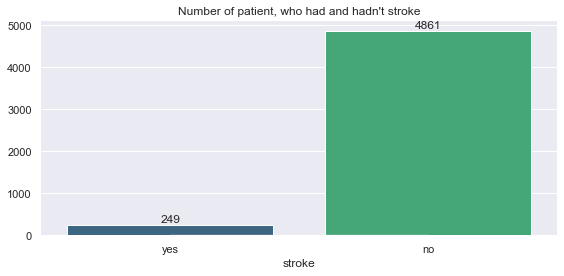

In [17]:
h.plot_countplot(
    stroke_df,
    "stroke",
    None,
    "Number of patient, who had and hadn't stroke",
)

There is a really huge data imbalance, as the number of people, who had stroke is only 249 and who hadn't - 4861. This can affect models in predicting stroke a lot, I think some up sampling will be needed. So I should not loos any of the positive "stroke" outcome.

* **gender** - predictor.

In [18]:
stroke_df.gender.value_counts()

female    2994
male      2115
other        1
Name: gender, dtype: int64

There are more female patients than male, but the number differ not so much. There is only one value "other". It is impossible to use one value as a predictor, so in this case, i'll drop this value. But in the future, when more data would be collected, especially with this kind of value, the model must be updated with the new value "other" in the feature "gender".

In [19]:
stroke_df = stroke_df[stroke_df.gender != "other"]

In [20]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   object 
 3   heart_disease      5109 non-null   object 
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   object 
dtypes: float64(3), object(8)
memory usage: 479.0+ KB


Now let's see the percentage of stroke per female and male.

In [21]:
h.make_crosstab_percent(stroke_df, "gender", "stroke")

stroke,no,yes
gender,,
female,95.2906,4.7094
male,94.8936,5.1064


In [22]:
h.make_crosstab_number(stroke_df, "gender", "stroke")

stroke,no,yes
gender,,
female,2853,141
male,2007,108


Some studies have confirmed that stroke is more common among men than women, [more about this here](https://www.ahajournals.org/doi/pdf/10.1161/strokeaha.108.540781). From our data, we also see that the difference of stroke cases in percentage between man and woman is about 0.4 percent. Is this difference statistically significant? 

* **Inferential statistical analysis:**

**Research question:**
Is the difference in proportions of patients, who had stroke, among female and male gender, statistically significant?

**Population** All patients.

Subgroups:
* p(1) female = 2994
* p(2) male = 2115

**Parameter of interest:** 
Difference in population proportions: p(1) - p(2)
                                      

**Power of the test:** ($1 - \beta$) - 0.8 

**Significance level**: 0.05

**Null Hypothesis:** p1 - p2 = 0  (there is no difference)

**Alternative Hypothesis:** p1 - p2 < 0

One tail testing, the difference is < 0.

**Assumptions**:
1. Our samples are independent from each other (taken from different gender of people, on different time).

In [23]:
inferent_statist_gender = h.Diff_2_proportions(stroke_df, "gender", "stroke")

In [24]:
inferent_statist_gender.make_table()


Table of stroke per each group of gender


,proportion,total_count
gender,,
female,0.0471,2994
male,0.0511,2115


In [25]:
inferent_statist_gender.total_proportion()

Total proportion of stroke cases in the dataset:


0.04873752201996477

In [26]:
inferent_statist_gender.diff_of_proportions()

Difference of two independent proportions:


-0.003969641410480534

In [27]:
inferent_statist_gender.sample_size_needed()

Required sample size:46474


I have a much smaller sample sizes, so I should be aware of possible p-hacking.

In [28]:
inferent_statist_gender.std_error()
inferent_statist_gender.t_statistics()

Computed Test Statistic is:


-0.6490565013589283

In [29]:
inferent_statist_gender.p_value()

Computed P-value is


0.2581509282018538

The difference of the proportions of those, who had stroke among woman and men is very low (in this sample): -0.003969. The aim was to check is this difference statistically significant. 
From this observed data we got, that the T -statistics in the difference of two proportions is -0.65, so our observed difference in sample proportions is only -0.65 estimated standard errors below our hypothesized mean (0) of equal population proportions. Based on our sample and our p-value, which is 0.258, so higher than our set alpha value of 0.05, we haven't enough evidence to reject the null hypothesis. 
In this case, we conclude that there is not enough evidence to conclude that the difference between the population proportions of those, who had stroke among women and men, is statistically significant.
Let's check the Confidence interval.

* **Confidence intervals**

1. Confidence level of 95%.
2. Significant level alpha = 0.05

In [30]:
inferent_statist_gender.conf_interval_of_difference()

CI in proportion of stroke cases among female and male:


(-0.016282161873954266, 0.0083428790529932)

The 95% confidence interval above shows us that any value for the difference of population proportions (between stroke cases among female and male) is lying between -0.016 and 0.008, this is consistent with the observed data, and our estimated difference was -0.0039, which is in that range. 0 is also in this range, so the null hypothesis, that the difference between proportions could be 0 was not rejected correctly.

So we cannot indicate, that gender by itself could be a good predictor for predicting stroke. The difference of stroke cases among female and male is not statistically significant and the proportions of stroke cases among women and men are actually almost equal.

* **heart_disease** - predictor.

In [31]:
stroke_df.heart_disease.value_counts()

no     4833
yes     276
Name: heart_disease, dtype: int64

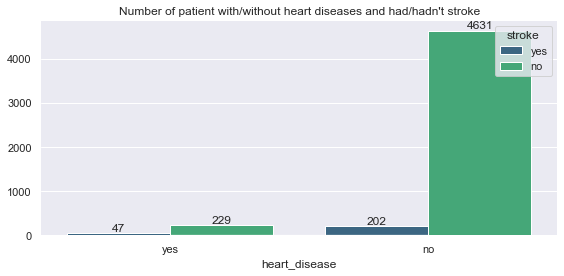

In [32]:
h.plot_countplot(
    stroke_df,
    "heart_disease",
    "stroke",
    "Number of patient with/without heart diseases and had/hadn't stroke",
)

In [3]:
heart_stroke = h.make_crosstab_percent(stroke_df, "heart_disease", "stroke")
heart_stroke_transf = heart_stroke.reset_index()
h.plot_stacked_barchart_plotly(
    heart_stroke_transf,
    "heart_disease",
    ["yes", "no"],
    "Percentage of stroke cases by heart disease indication",
    "Stroke:",
)

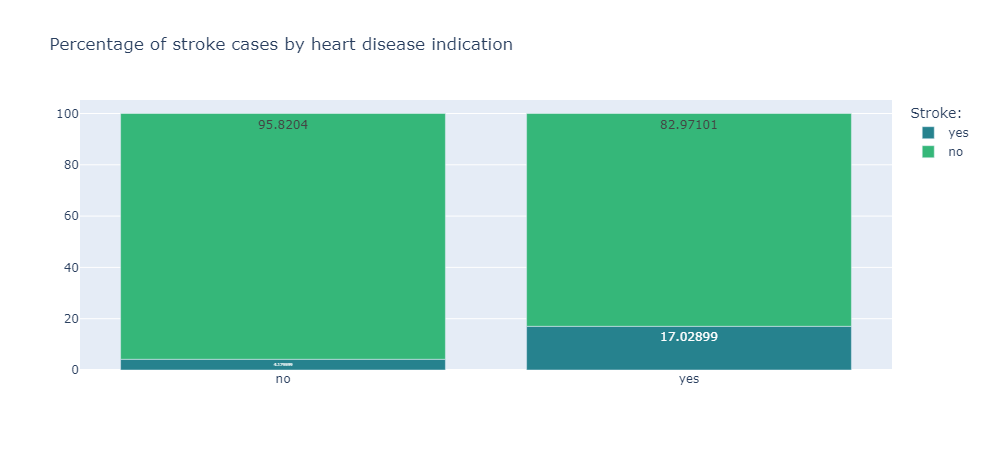

In [34]:
# If plotly doesn't show a chart, here it is.
Image(filename="png_files\heart_disease.png")

So we see that 17 percent of people with heart diseases and only 4 percent of those without heart diseases had gotten stroke.

* **ever_married** - predictor.

In [42]:
stroke_df.ever_married.value_counts()

yes    3353
no     1756
Name: ever_married, dtype: int64

The majority of patients were married, so let's see does marriage affect stroke cases or not.

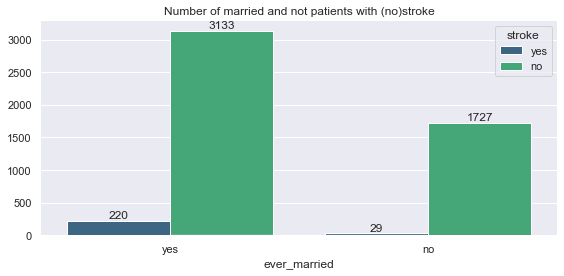

In [43]:
h.plot_countplot(
    stroke_df,
    "ever_married",
    "stroke",
    "Number of married and not patients with (no)stroke",
)

Let's check the percentage.

In [44]:
h.make_crosstab_percent(stroke_df, "ever_married", "stroke")

stroke,no,yes
ever_married,,
no,98.3485,1.6515
yes,93.4387,6.5613


Having in mind, that the number of not married people is lower, let's still check is this difference of stroke proportions among married and not married people statistically significant?

* **Inferential statistical analysis:**

**Research question:**
Is the difference in proportions of patients, who had stroke, among not married and married, statistically significant?

**Population** All patients.

Subgroups:
* p(1) not married = 1756
* p(2) married = 3353

**Parameter of interest:** 
Difference in population proportions: p(1) - p(2)
                                      

**Power of the test:** ($1 - \beta$) - 0.8 

**Significance level**: 0.05

**Null Hypothesis:** p1 - p2 = 0  (there is no difference)

**Alternative Hypothesis:** p1 - p2 > 0

One tail testing, the difference is > 0.

**Assumptions**:
1. Our samples are independent from each other (taken from different groups of patients (married and not), on different time).

In [45]:
inf_statistics_marriage = h.Diff_2_proportions(stroke_df, "ever_married", "stroke")
inf_statistics_marriage.make_table()

Table of stroke per each group of ever_married


,proportion,total_count
ever_married,,
no,0.0165,1756
yes,0.0656,3353


In [46]:
inf_statistics_marriage.total_proportion()

Total proportion of stroke cases in the dataset:


0.04873752201996477

In [47]:
inf_statistics_marriage.diff_of_proportions()

Difference of two independent proportions:


-0.04909807760635938

In [48]:
inf_statistics_marriage.sample_size_needed()

Required sample size:232


I have a much larger sample size in both subgroups, so p-hacking should be avoid.

In [49]:
inf_statistics_marriage.std_error()
inf_statistics_marriage.t_statistics()

Computed Test Statistic is:


-7.740939330349397

In [50]:
inf_statistics_marriage.p_value()

Computed P-value is


4.934249189130743e-15

The difference of the proportions of those, who had stroke among not married and married people (in this sample): -0.05. The aim was to check is this difference statistically significant. 
From this observed data we got, that the T -statistics in the difference of two proportions is -7.74, so our observed difference in sample proportions is even -7.74 estimated standard errors below our hypothesized mean (0) of equal population proportions. Based on our sample and our p-value, which is 4.934249189130743e-15, so lower than our set alpha value of 0.05, we have enough evidence to reject the null hypothesis. 
In this case, we conclude that there is enough evidence to conclude that the  difference between the population proportions of those, who had stroke among not married and married people, is statistically significant.
Let's check the Confidence interval.

* **Confidence intervals**

1. Confidence level of 95%.
2. Significant level alpha = 0.05

In [51]:
inf_statistics_marriage.conf_interval_of_difference()

CI in proportion of stroke cases among female and male:


(-0.059592636318438495, -0.03860351889428027)

The 95% confidence interval above shows us that any value for the difference of population proportions (between stroke cases among not married and married people) is lying between -0.06 and -0.04, this is consistent with the observed data, and our estimated difference was -0.05, which is in that range. 0 is not in this range, so the null hypothesis, that the difference between proportions could be 0 was rejected correctly. It is confirmed, that there tend to be from 4 to 6 percent more stroke cases among married people, than among not married.

* **work_type** - predictor.

In [52]:
stroke_df.work_type.value_counts()

private          2924
self-employed     819
children          687
govt_job          657
never_worked       22
Name: work_type, dtype: int64

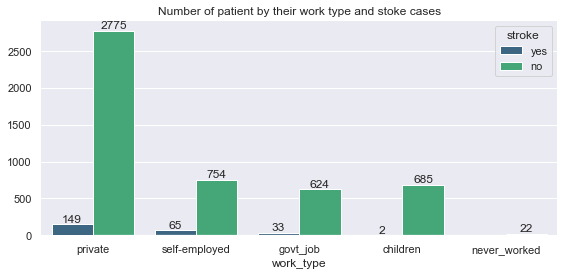

In [53]:
h.plot_countplot(
    stroke_df,
    "work_type",
    "stroke",
    "Number of patient by their work type and stoke cases",
)

Let's check the percentage.

In [54]:
work_stroke = h.make_crosstab_percent(stroke_df, "work_type", "stroke")
work_stroke_transf = work_stroke.reset_index()
h.plot_stacked_barchart_plotly(
    work_stroke_transf,
    "work_type",
    ["yes","no"],
    'Percentage of stroke cases by patients work type',
    'Stroke:',
)

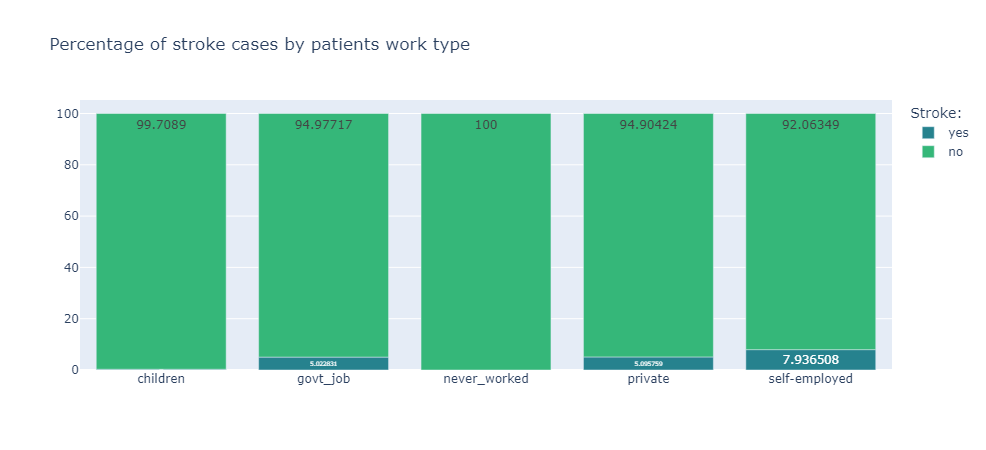

In [55]:
# If plotly doesn't show a chart, here it is.
Image(filename="png_files\work.png")

So, it seems that the largest number of stroke cases were among patients, working as self employed - almost 8 percent of respondents in this group had faced stroke, private and government sectors go along with each other with a little bit over 5 percent of stroke cases among the respondents of these groups. Self employment must be a quite good factor for possible stroke predictions, especially having in mind that the number of respondents in this group wasn't the largest. So I will leave these groups of values separate: private, government and self employed. 

Let's check what group is children, are there parents, who are raising children and not working or these respondents are children by their age.

In [56]:
children = stroke_df[stroke_df["work_type"] == "children"][["age"]]
children.min()


age   0.0800
dtype: float64

In [57]:
children.max()

age   16.0000
dtype: float64

So yes, this group of column "work_type" is children by their age, that do not work. So let's combine the values of children and never_work into - not_working.

In [58]:
stroke_df.loc[stroke_df["work_type"] == "children", "work_type"] = "not_working"

In [59]:
stroke_df.loc[stroke_df["work_type"] == "never_worked", "work_type"] = "not_working"

In [60]:
stroke_df.work_type.value_counts()

private          2924
self-employed     819
not_working       709
govt_job          657
Name: work_type, dtype: int64

All in all, seems that self employed people are under bigger risk to get a stroke.

* **residence_type** - predictor.

In [61]:
stroke_df.residence_type.value_counts()

urban    2596
rural    2513
Name: residence_type, dtype: int64

These two groups are very equal in the number of observations, so let's see how stroke "is spread" among them.

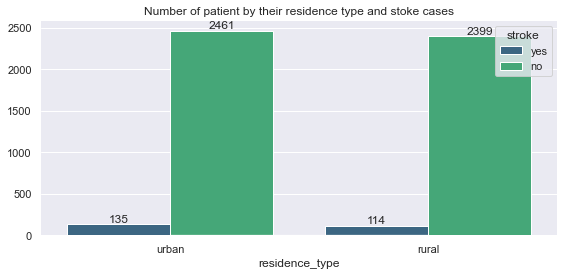

In [62]:
h.plot_countplot(
    stroke_df,
    "residence_type",
    "stroke",
    "Number of patient by their residence type and stoke cases",
)

Looks very equal also.

In [63]:
h.make_crosstab_percent(stroke_df, "residence_type", "stroke")

stroke,no,yes
residence_type,,
rural,95.4636,4.5364
urban,94.7997,5.2003


The percentage also shows, that according to this dataset, the proportion of stroke cases is quite equal among people who live in the city and in the rural areas. In both groups of patient, by their residence type, there were about 5 percent of stroke cases in total. So I would not estimate this feature as a good predictor of stroke.

* **smoking_status** - predictor.

In [64]:
stroke_df.smoking_status.value_counts()

never smoked       1892
unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

Quite a large number of respondents did not give an answer to this question and it is unknown do they smoke or not. Let's see how "stroke spreads" in this feature.

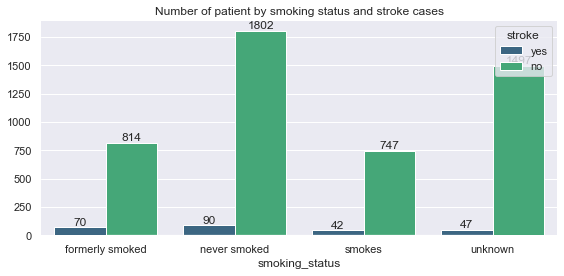

In [65]:
h.plot_countplot(
    stroke_df,
    "smoking_status",
    "stroke",
    "Number of patient by smoking status and stroke cases",
)

And the percentage.

In [4]:
smoke_stroke = h.make_crosstab_percent(stroke_df, "smoking_status", "stroke")
smoke_stroke_transf = smoke_stroke.reset_index()
h.plot_stacked_barchart_plotly(
    smoke_stroke_transf,
    "smoking_status",
    ["yes", "no"],
    "Percentage of stroke cases by smoking status",
    "Stroke:",
)

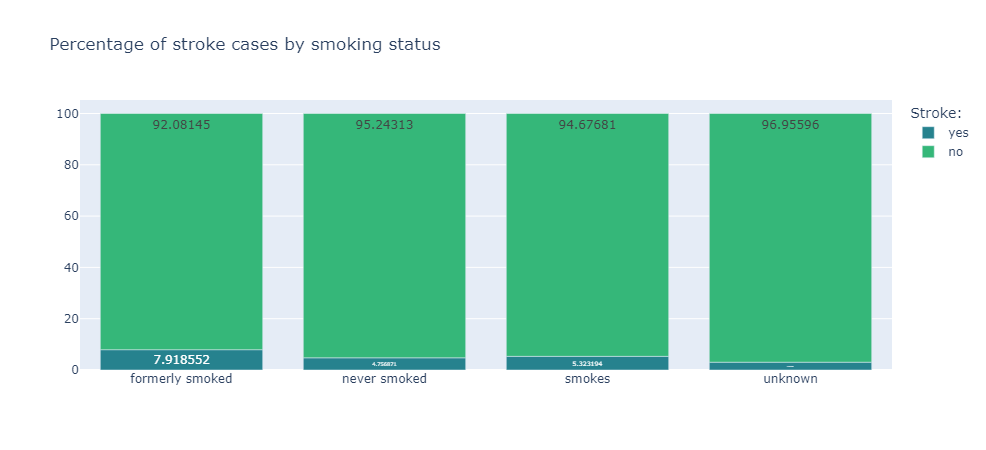

In [67]:
# If plotly doesn't show a chart, here it is.
Image(filename="png_files\smokers.png")

Looks like smoking does affect possibility of stroke, so let's lower down the possible values of this feature.

In [68]:
stroke_df.loc[stroke_df["smoking_status"] == "formerly smoked", "smoking_status"] = "smokes"

In [69]:
stroke_df.smoking_status.value_counts()

never smoked    1892
smokes          1673
unknown         1544
Name: smoking_status, dtype: int64

Let's check now the proportion of strokes in these quite equal groups.

In [70]:
h.make_crosstab_percent(stroke_df, "smoking_status", "stroke")

stroke,no,yes
smoking_status,,
never smoked,95.2431,4.7569
smokes,93.3054,6.6946
unknown,96.9560,3.0440


As we see, there is no such huge difference, but group of smokers with 6.7 percent of stroke cases lead, then goes never smoked - 4.8 percent and unknown - 3 percent. As in this feature we have a lot of unknown values, I would not count on it as a reliable indicator for stroke predictions.

* **hypertension** - predictor/target.

In [71]:
stroke_df.hypertension.value_counts()

no     4611
yes     498
Name: hypertension, dtype: int64

The majority of respondents did not have hypertension. Let's see how it looks, when comparing with stroke cases.

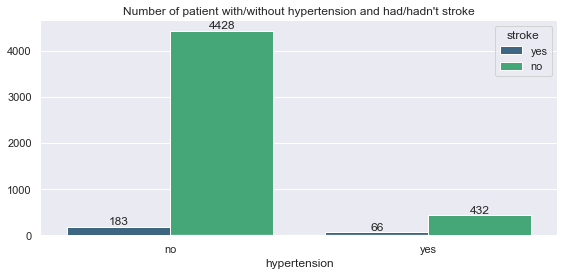

In [72]:
h.plot_countplot(
    stroke_df,
    "hypertension",
    "stroke",
    "Number of patient with/without hypertension and had/hadn't stroke",
)

In [73]:
h.make_crosstab_percent(stroke_df, "hypertension", "stroke")

stroke,no,yes
hypertension,,
no,96.0312,3.9688
yes,86.7470,13.2530


So, from the percentage we can see more clearly, almost 4 percent of people, who hadn't hypertension diagnosis, had faces stroke, but among people with hypertension this percentage of stroke cases is even 13.25.

* **New feature.**

I want to check also how many patient have heart diseases and hypertension at the same time and what is the proportion of strokes there.

In [81]:
h.make_crosstab_number(stroke_df, "heart_disease", "hypertension")

hypertension,no,yes
heart_disease,,
no,4399,434
yes,212,64


So only 64 patients at the same time had heart disease and hypertension. Let's make a new feature with people, who has both conditions and the see what is the proportion of strokes there.

In [82]:
def heart_hyper_feature(stroke_df): 
    if (stroke_df["heart_disease"] == "yes") & (stroke_df["hypertension"] == "yes") : 
        return "yes"
    else : 
        return "no"

stroke_df["heart_hypertenz"] = stroke_df.apply(lambda x : heart_hyper_feature(x),axis=1)

In [83]:
h.make_crosstab_percent(stroke_df, "heart_hypertenz", "stroke")

stroke,no,yes
heart_hypertenz,,
no,95.3221,4.6779
yes,79.6875,20.3125


So 20 percent of those with both conditions actually had stroke. Maybe it will be one of the possibilities to predict stroke.

* **"hypertension" vs. categorical features**

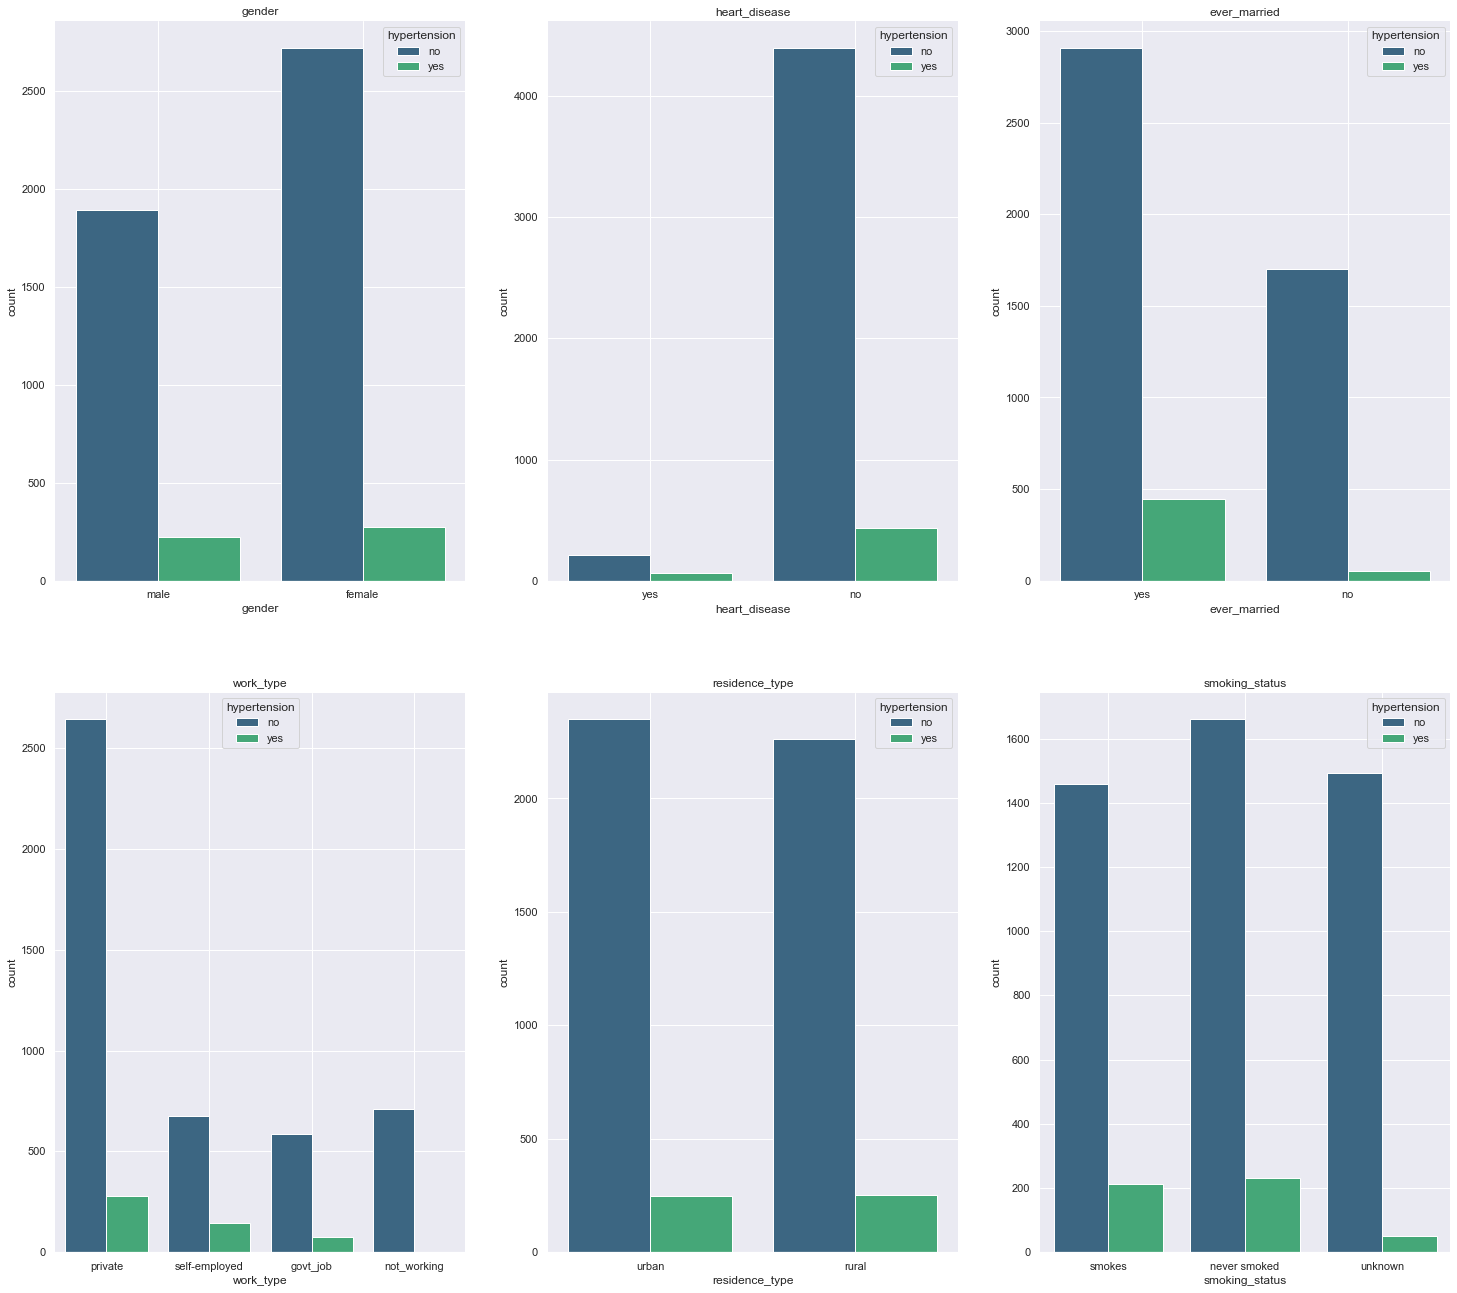

In [84]:
categorical_features = stroke_df[
    [
        "gender",
        "heart_disease",
        "ever_married",
        "work_type",
        "residence_type",
        "smoking_status",
        "hypertension",
    ]
]

h.plot_categorical_countplots(categorical_features, "hypertension")

So possible predictors for the "hypertension" column:
* gender - maybe: female tend to have hypertension more often, but the number of women patients is larger also;
* heart_diseases - no: seems not so related with hypertension, as more people have hypertension diagnosis without having heart diseases;
* ever_married - yes: married people suffer from hypertension more often, but still there are more married patients all in all;
* work_type - yeas: private and self employed work type is a risk factor for hypertension;
* residence_type - no: fresh air doesn't impact lower number of hypertension in the rural areas;
* smoking_status - no: there is no clear distinction between smokers and non smokers in the number of hypertension cases.

* **Hypertension vs. numerical features**

In [85]:
numerical_feat = stroke_df[["age", "avg_glucose_level", "bmi", "hypertension"]]

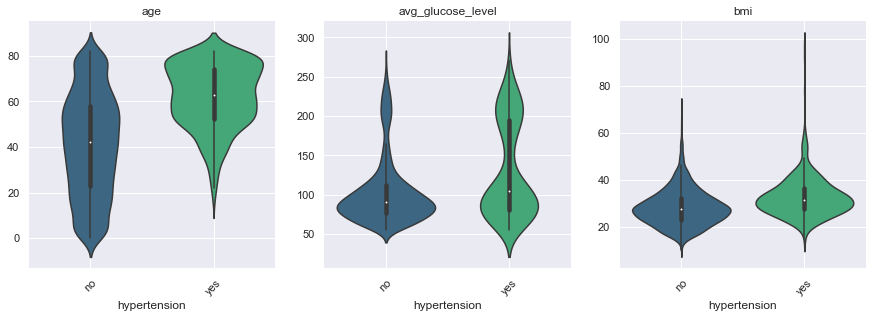

In [86]:
h.multiple_violinplots(numerical_feat, "hypertension")

Good predictor:
* age, as clearly the mean of age is higher among the patients with hypertension.

BMI and average glucose level is actually quite similar in both cases (with hypertension and without).

### 2.3.2. Quantitative features.

* **age** - predictor.

Based on information, given [here](https://www.cdc.gov/stroke/risk_factors.htm), the older you are, the more risk you have to get a stroke. The chance of having a stroke doubles about every 10 years after age 55. Although stroke is common among older adults, many people younger than 65 years also have strokes. Let's how is the situation in this data.

In [87]:
stroke_df.age.describe()

count   5109.0000
mean      43.2300
std       22.6136
min        0.0800
25%       25.0000
50%       45.0000
75%       61.0000
max       82.0000
Name: age, dtype: float64

So age values vary from 0.08 to 82 years, so from almost newborn to pensioner. There are no bad outliers, all given values of age are possible.

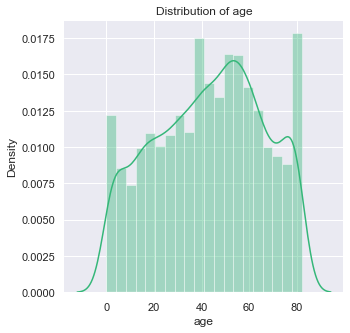

In [88]:
h.plot_distplot(stroke_df, "age")

To make this distribution look more  normal I'll add new feature - log transformed column of age.

In [89]:
stroke_df["log_of_age"] = [np.log(x) for x in stroke_df["age"]]
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,heart_hypertenz,log_of_age
0,male,67.0000,no,yes,yes,private,urban,228.6900,36.6000,smokes,yes,no,4.2047
1,female,61.0000,no,no,yes,self-employed,rural,202.2100,NaN,never smoked,yes,no,4.1109
2,male,80.0000,no,yes,yes,private,rural,105.9200,32.5000,never smoked,yes,no,4.3820
3,female,49.0000,no,no,yes,private,urban,171.2300,34.4000,smokes,yes,no,3.8918
4,female,79.0000,yes,no,yes,self-employed,rural,174.1200,24.0000,never smoked,yes,no,4.3694


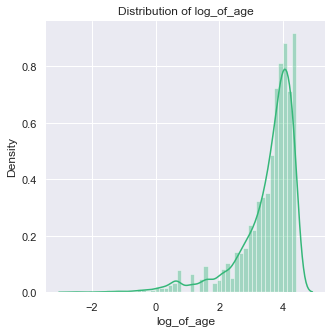

In [90]:
h.plot_distplot(stroke_df, "log_of_age")

Actually the distribution now looks left skewed even more.

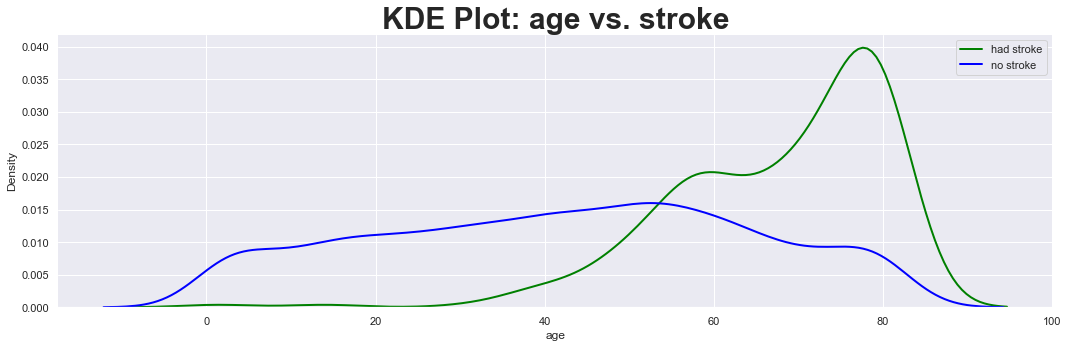

In [91]:
h.plot_kde(stroke_df, "age", "stroke")

So, we have incidents of stroke actually in all age groups, but from age about 35 years, the number of people, who had stroke, begins to rise quite steadily (with one smoothening occurring over 60 year) and the peak in about 78 years. So it seems, that information given above has been approved, older people seem to have strokes more often (having in mind, that they can also have other dangerous conditions that together can cause stroke) and the quicker rise begins from about 40 years. So it could be useful to bin age in groups by twenty years and see the number of observations in each bin, the most useful ones are from 40 years actually.

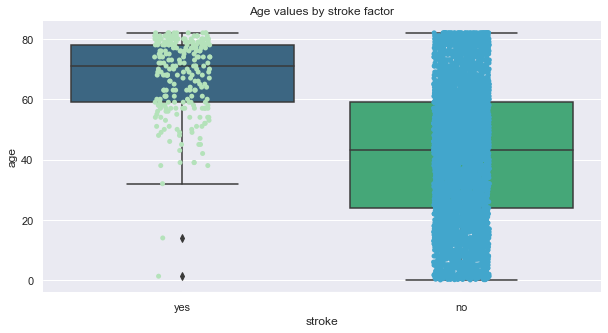

In [92]:
h.plot_box_stripplot(
    stroke_df, "stroke", "age", "Age values by stroke factor"
)

In [93]:
stroke_mean = stroke_df[stroke_df["stroke"] == "yes"]["age"].mean()
stroke_mean

67.72819277108434

In [94]:
non_stroke_mean = stroke_df[stroke_df["stroke"] == "no"]["age"].mean()
non_stroke_mean

41.974831275720184

Clearly we can indicate, that patients, who with stroke condition has a lot higher mean of age in this data set - thats almost 68 year, while in the group of "non strokers" the mean of age is only 42 years. So there's not even any need to do inferential statistics, we clearly see that age of the patient could be one of the good predictors for stroke predictions, the older the person, especially over 65 years, the more chances to face stroke.

In [95]:
stroke_df["age_bins"] = pd.cut(x=stroke_df["age"], bins=[0, 20, 40, 60, 80, 100],
                    labels=["0-20", "21-40", "41-60", "61-80", "81-100"])

In [96]:
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,heart_hypertenz,log_of_age,age_bins
0,male,67.0000,no,yes,yes,private,urban,228.6900,36.6000,smokes,yes,no,4.2047,61-80
1,female,61.0000,no,no,yes,self-employed,rural,202.2100,NaN,never smoked,yes,no,4.1109,61-80
2,male,80.0000,no,yes,yes,private,rural,105.9200,32.5000,never smoked,yes,no,4.3820,61-80
3,female,49.0000,no,no,yes,private,urban,171.2300,34.4000,smokes,yes,no,3.8918,41-60
4,female,79.0000,yes,no,yes,self-employed,rural,174.1200,24.0000,never smoked,yes,no,4.3694,61-80


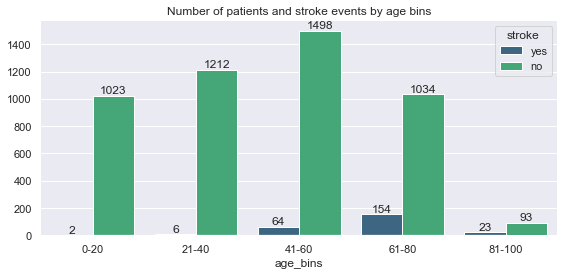

In [97]:
h.plot_countplot(
    stroke_df,
    "age_bins",
    "stroke",
    "Number of patients and stroke events by age bins",
)

So now we clearly see the growing number of stroke events in older groups of people even when we have less observations in those groups. I think and hope that this new feature with less unique values could be a better predictor for stroke feature than all age values in total. Let's see the percentage of stroke cases by age groups.

In [98]:
age_bins_stroke = h.make_crosstab_percent(stroke_df, "age_bins", "stroke")
age_bins_stroke

stroke,no,yes
age_bins,,
0-20,99.8049,0.1951
21-40,99.5074,0.4926
41-60,95.9027,4.0973
61-80,87.0370,12.9630
81-100,80.1724,19.8276


In [99]:
age_bins_stroke_transf = age_bins_stroke.reset_index()
h.plot_stacked_barchart_plotly(
    age_bins_stroke_transf,
    "age_bins",
    ["yes","no"],
    "Percentage of stroke cases by patients age bins",
    "Stroke:"
)

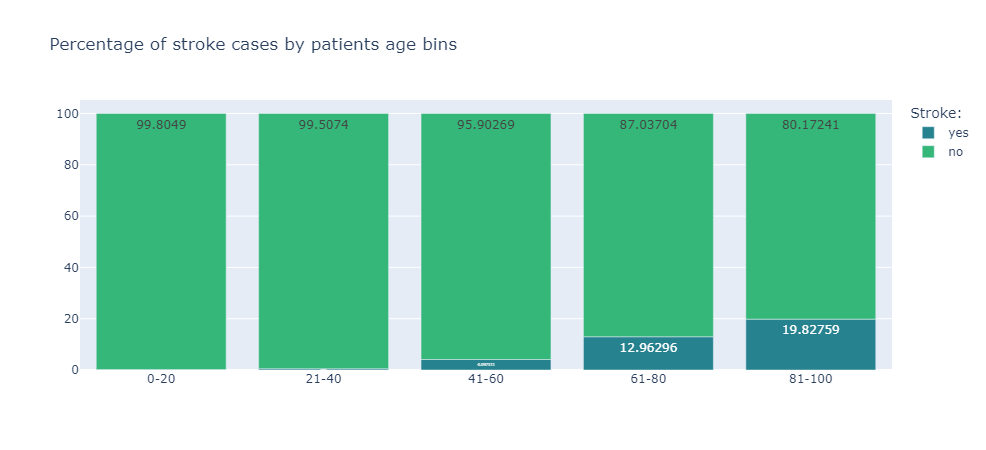

In [100]:
# If plotly doesn't show a chart, here it is.
Image(filename="png_files\\age.png")

The percentage of stroke cases steadily increases in each age group, and, of course, the older the age bin, the bigger the number of stroke cases. In the last group of age from 80 we have almost 20 percent of stroke cases. So patients age is a good indicator for possibility of stroke.

* **avg_glucose_level** - predictor/target.

First of all diabetes is one of the medical factors which can increase the risk of stroke, [more here](https://www.mayoclinic.org/diseases-conditions/stroke/symptoms-causes/syc-20350113). And diabetes can be determined by the average glucose level in the humans blood. 

But the very important issue is the time, when the blood was taken: in the morning, after eating, after 2-3 hours from last eating, as these factors cause different level of glucose in humans blood. But on average, we can see below, that glucose level varies from 80 to even 300 mg/dl, so all these values are possible.

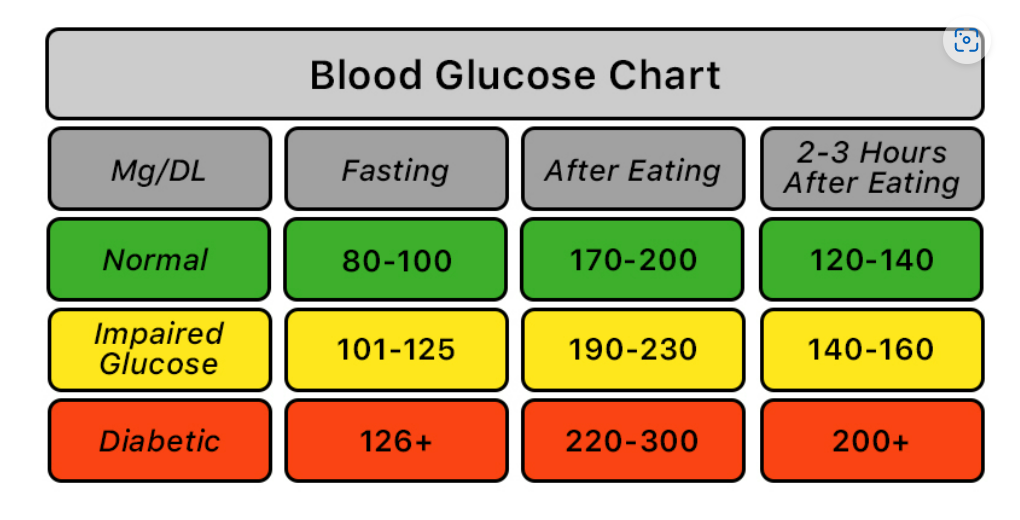

In [101]:
# Information taken from: https://www.lark.com/blog/blood-sugar-chart/
Image(filename="png_files\\blood_glucose.png") 

In [102]:
stroke_df.avg_glucose_level.describe()

count   5109.0000
mean     106.1404
std       45.2850
min       55.1200
25%       77.2400
50%       91.8800
75%      114.0900
max      271.7400
Name: avg_glucose_level, dtype: float64

We have minimum value of 55 and maximum of 271, so all values are normal and cannot be treated as bad data, so I will not drop or change them. I think that these blood samples were taken at different time, as we see that the range of average glucose level is for sure to wide (some values, like over 220 mg/dl indicates, that probably blood was taken after eating, others - less than 60 mg/dl - probably in the morning before eating). So this data should be specified with certain time of the blood sampling.

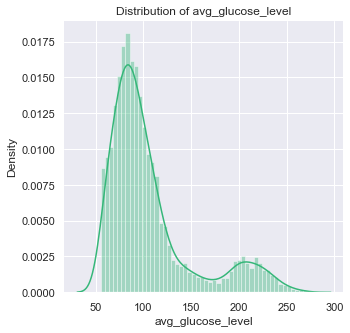

In [103]:
h.plot_distplot(stroke_df, "avg_glucose_level")

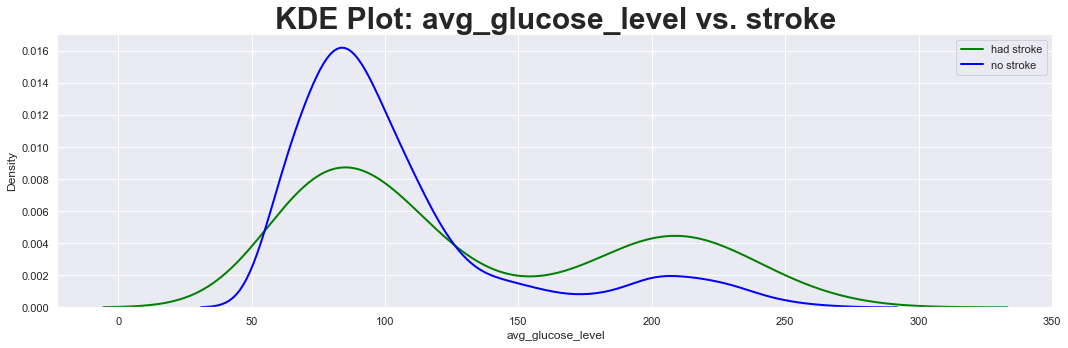

In [104]:
h.plot_kde(stroke_df, "avg_glucose_level", "stroke")

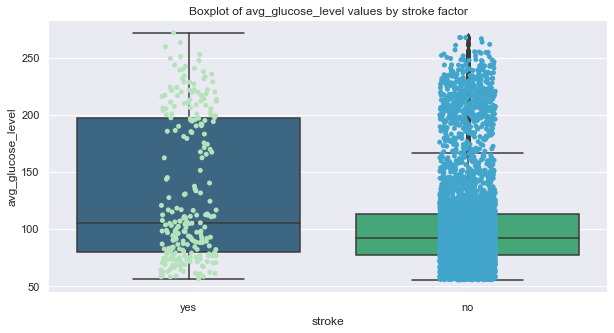

In [105]:
h.plot_box_stripplot(
    stroke_df, "stroke", "avg_glucose_level", "Boxplot of avg_glucose_level values by stroke factor"
)

That's interesting, we have two peaks in the number of stroke's by avg_glucose_level, first is about 75 and second is over 200 mg/ml. And clearly there starts to be more cases of stroke when avg_glucose_level exceeds 125 mg/dl. For sure, higher glucose level in the blood (over 125 mg/dl) indicates possible diabetes and higher possibility of stroke. From the box plot we see that there are lot's of values over the 75th percentile, so I will log transform the feature to dampen the effect of the outlier.

* **New features**.

In [106]:
stroke_df["log_of_avg_glucose_level"] = [np.log(x) for x in stroke_df["avg_glucose_level"]]

In [107]:
stroke_df["glucose_bins"] = pd.cut(x=stroke_df["avg_glucose_level"], bins=[50, 100, 150, 200, 250, 300],
                    labels=["51-100 mg/dl", "101-150 mg/dl", "151-200 mg/dl",
                            "201-250 mg/dl", "over 250 mg/dl"])

In [108]:
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,heart_hypertenz,log_of_age,age_bins,log_of_avg_glucose_level,glucose_bins
0,male,67.0000,no,yes,yes,private,urban,228.6900,36.6000,smokes,yes,no,4.2047,61-80,5.4324,201-250 mg/dl
1,female,61.0000,no,no,yes,self-employed,rural,202.2100,NaN,never smoked,yes,no,4.1109,61-80,5.3093,201-250 mg/dl
2,male,80.0000,no,yes,yes,private,rural,105.9200,32.5000,never smoked,yes,no,4.3820,61-80,4.6627,101-150 mg/dl
3,female,49.0000,no,no,yes,private,urban,171.2300,34.4000,smokes,yes,no,3.8918,41-60,5.1430,151-200 mg/dl
4,female,79.0000,yes,no,yes,self-employed,rural,174.1200,24.0000,never smoked,yes,no,4.3694,61-80,5.1597,151-200 mg/dl


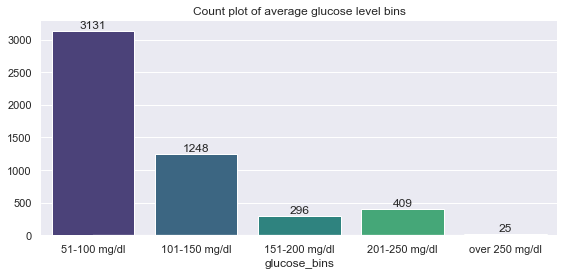

In [109]:
h.plot_countplot(stroke_df, "glucose_bins", None, "Count plot of average glucose level bins")

The majority of people have normal average glucose level.

In [110]:
glucose_bins_stroke = h.make_crosstab_percent(stroke_df, "glucose_bins", "stroke")
glucose_bins_stroke

stroke,no,yes
glucose_bins,,
51-100 mg/dl,96.4229,3.5771
101-150 mg/dl,96.2340,3.7660
151-200 mg/dl,88.5135,11.4865
201-250 mg/dl,87.5306,12.4694
over 250 mg/dl,80.0000,20.0000


In [111]:
glucose_bins_stroke_transf = glucose_bins_stroke.reset_index()
h.plot_stacked_barchart_plotly(
    glucose_bins_stroke_transf,
    "glucose_bins",
    ["yes","no"],
    "Percentage of stroke cases by patients avg_glucose_level bins",
    "Stroke:"
)

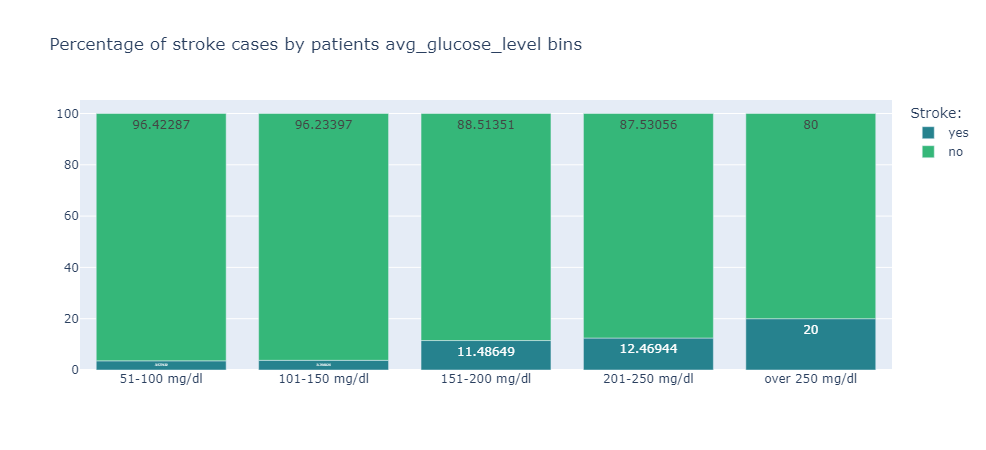

In [112]:
# If plotly doesn't show a chart, here it is.
Image(filename="png_files\glucose.png")

So we see, that  when average glucose level exceeds 150 mg/dl (that's pre-diabetes or even diabetes diagnosis when blood is taken before eating in early morning) the percentage of stroke cases increase more than 7 percent (from 3.8 percent in the group of glucose level 101-150 mg/dl). Further average glucose level increase (over 200 mg/dl), causes even higher percentage of stroke, which reaches 20 percent of all cases, when average glucose level is over 250 mg/dl (but there we have only 25 observations). So average glucose level is a good predictor of possible stroke.

* **Average glucose level vs. categorical features**

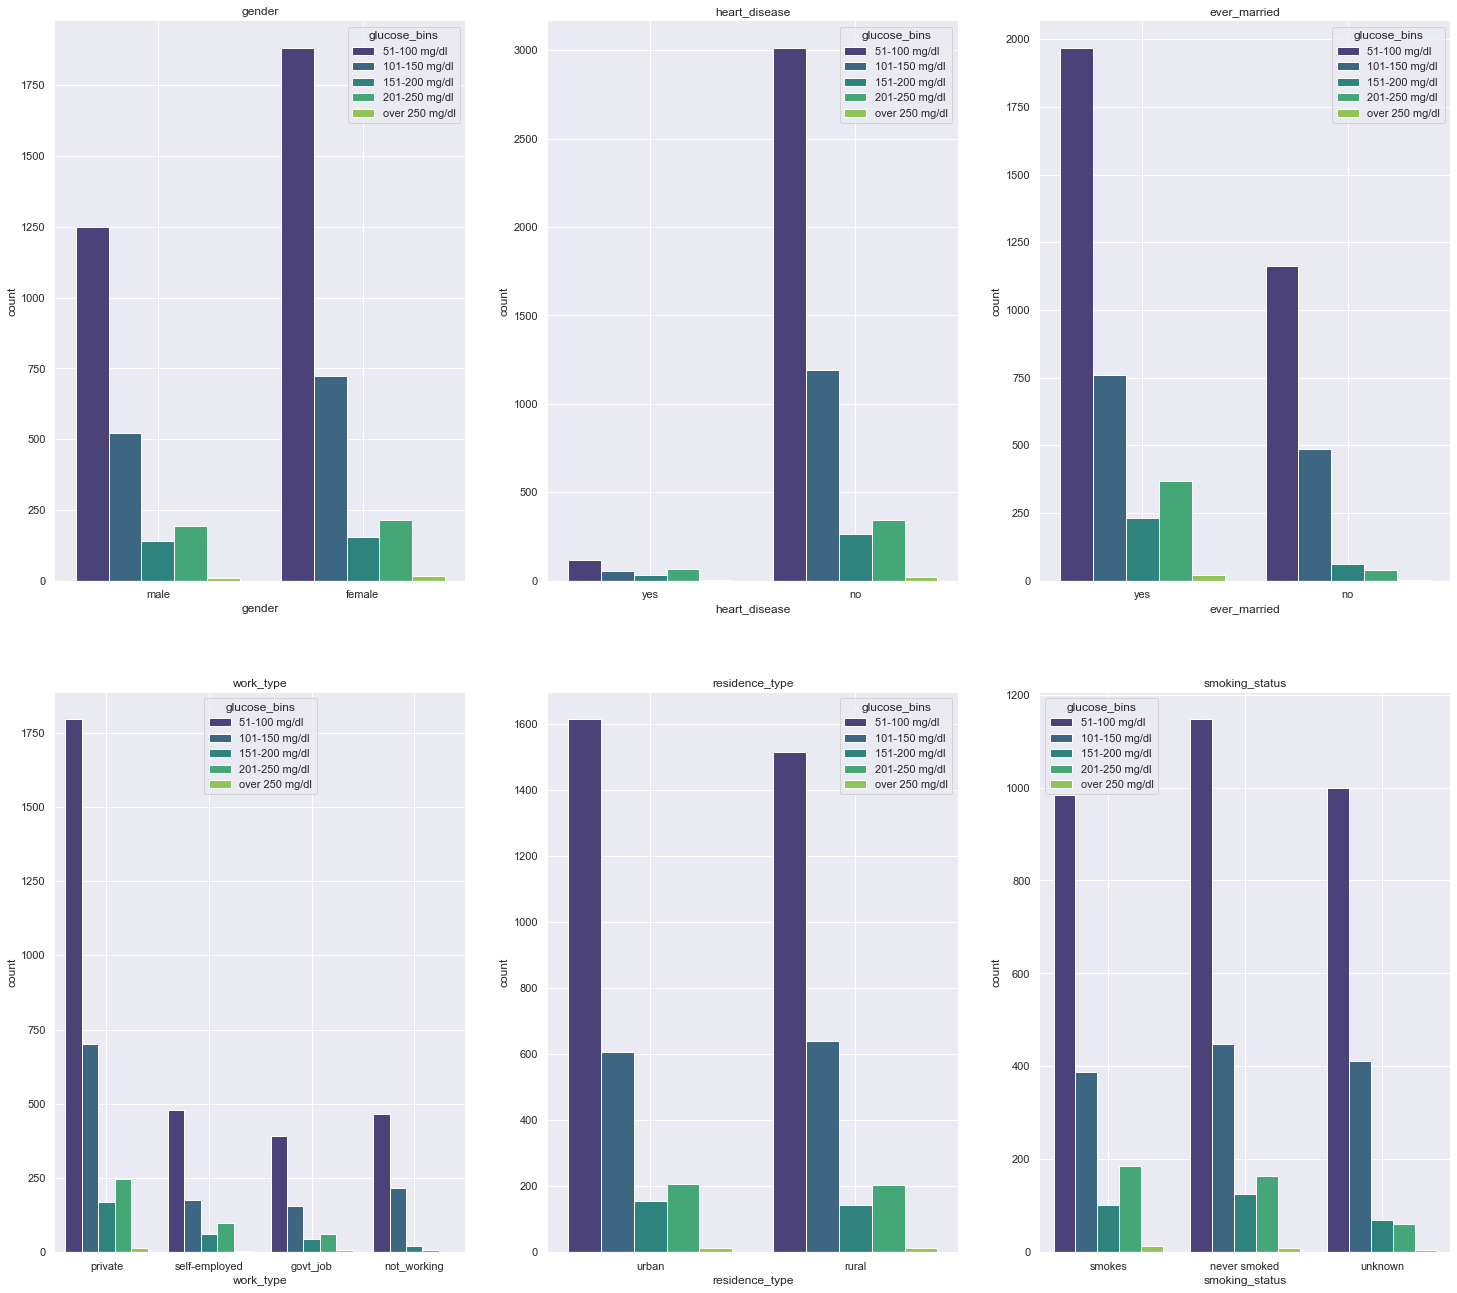

In [113]:
categorical_features = stroke_df[
    [
        "gender",
        "heart_disease",
        "ever_married",
        "work_type",
        "residence_type",
        "smoking_status",
        "glucose_bins",
    ]
]

h.plot_categorical_countplots(categorical_features, "glucose_bins")

From these count plots we can actually indicate, that most of the patients (respondents) had normal avg_glucose_level (between 51-100 mg/dl) and all other values vary quite a lot in all categorical values of the features. I cannot indicate no clear pattern.

* **Average glucose level vs. numerical features**

In [114]:
numerical_feat = stroke_df[["age", "bmi", "glucose_bins"]]

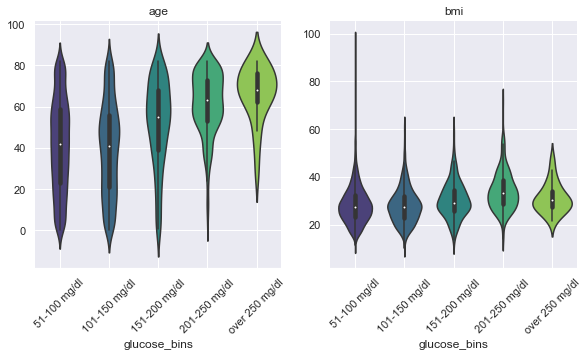

In [115]:
h.multiple_violinplots(numerical_feat, "glucose_bins")

So again, the higher is the group of glucose level, the higher is the mean of age. Older people tend to have higher average glucose level. We also see a little increase in mean bmi as the average glucose level goes up.

* **bmi** - predictor/target.

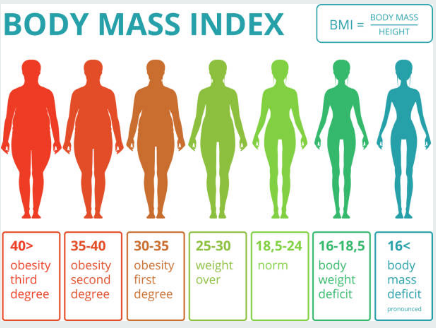

In [116]:
# Information taken from: https://www.istockphoto.com/vector/medical-infographics-with-illustrations-of-female-body-mass-index-scales-from-fat-to-gm865623098-143779013
Image(filename="png_files\\bmi.png") 

In [117]:
stroke_df.bmi.describe()

count   4908.0000
mean      28.8946
std        7.8543
min       10.3000
25%       23.5000
50%       28.1000
75%       33.1000
max       97.6000
Name: bmi, dtype: float64

In [118]:
stroke_df.bmi.isna().sum()

201

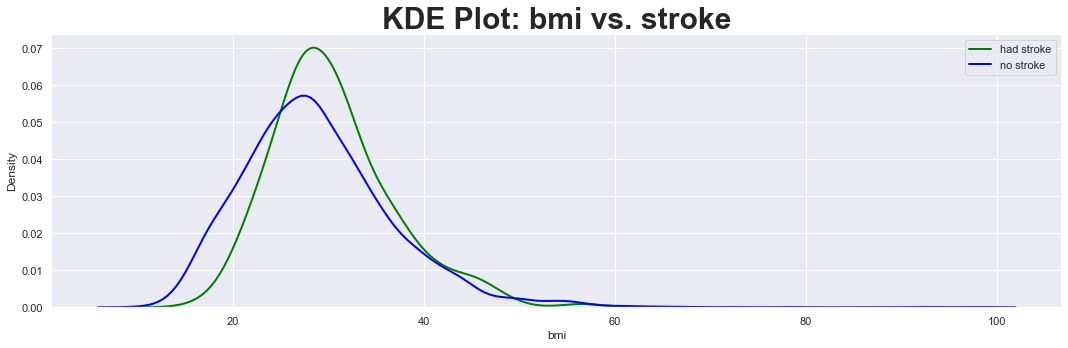

In [119]:
h.plot_kde(stroke_df, "bmi", "stroke")

It seems that the peak of stroke cases happens when the bmi is about 30, but that's  probably because there is the largest amount of observations.

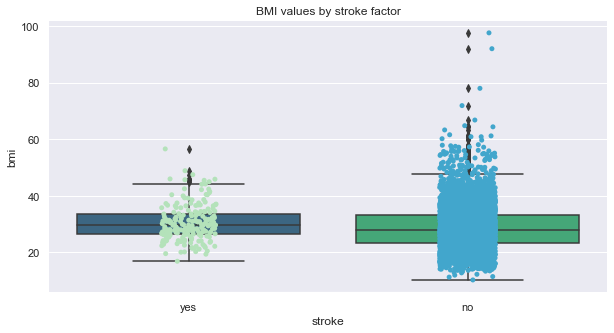

In [120]:
h.plot_box_stripplot(
    stroke_df, "stroke", "bmi", "BMI values by stroke factor"
)

We can see that there are outliers in both groups (stroke and not), in the values of body mass index. The mean of bmi is higher in the "stroke - yes" group. Higher than 90 bmi values should not be possible, so I'll change them manually to the NaN and we're fill all them together. 

In [121]:
stroke_df[stroke_df["bmi"] >= 90]

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,heart_hypertenz,log_of_age,age_bins,log_of_avg_glucose_level,glucose_bins
2128,male,17.0000,yes,no,no,private,rural,61.6700,97.6000,unknown,no,no,2.8332,0-20,4.1218,51-100 mg/dl
4209,male,38.0000,yes,no,yes,private,rural,56.9000,92.0000,never smoked,no,no,3.6376,21-40,4.0413,51-100 mg/dl


In [122]:
stroke_df.loc[stroke_df["bmi"] >= 90, "bmi"] = np.nan

In [123]:
stroke_df.bmi.isna().sum()

203

In [124]:
stroke_df[stroke_df.bmi.isna()]["stroke"].value_counts()

no     163
yes     40
Name: stroke, dtype: int64

So I enlarged the number of NaN values, but in this case i think it is better. BMI is NaN, but stroke is "yes" 40 times per this data set. It is too expensive to loose this data as total number of positive "stroke" outcomes is only 249. I consider two ways, that I will handle this:
1. imputation with mean of the bmi grouped by age and gender - when BMI is used as a predictor only (for "stroke", "hypertension" and "avg_glucose_level");
2. dropping NaN values - where BMI is a target variable, as it is "non sense" to make predictions on already predicted values.

First of all let's make separate datasets:
1. with dropped Nan values - for predicting bmi.
2. with filled Nan values.
3. stroke_df will be left as it is until this moment, if it would be useful later.

In [125]:
# Drop bmi nan dataset.

bmi_pred_dataset = stroke_df.copy()
bmi_pred_dataset.dropna(axis=0, inplace=True)
len(bmi_pred_dataset)

4906

In [126]:
# Fill bmi nan dataset.

filled_bmi_stroke_df = stroke_df.copy()
filled_bmi_stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,heart_hypertenz,log_of_age,age_bins,log_of_avg_glucose_level,glucose_bins
0,male,67.0000,no,yes,yes,private,urban,228.6900,36.6000,smokes,yes,no,4.2047,61-80,5.4324,201-250 mg/dl
1,female,61.0000,no,no,yes,self-employed,rural,202.2100,NaN,never smoked,yes,no,4.1109,61-80,5.3093,201-250 mg/dl
2,male,80.0000,no,yes,yes,private,rural,105.9200,32.5000,never smoked,yes,no,4.3820,61-80,4.6627,101-150 mg/dl
3,female,49.0000,no,no,yes,private,urban,171.2300,34.4000,smokes,yes,no,3.8918,41-60,5.1430,151-200 mg/dl
4,female,79.0000,yes,no,yes,self-employed,rural,174.1200,24.0000,never smoked,yes,no,4.3694,61-80,5.1597,151-200 mg/dl


In [127]:
filled_bmi_stroke_df["bmi"] = filled_bmi_stroke_df["bmi"].fillna(
    filled_bmi_stroke_df.groupby(["age", "gender"])["bmi"].transform("mean")
)

In [128]:
filled_bmi_stroke_df["bmi"] = filled_bmi_stroke_df["bmi"].fillna(
    filled_bmi_stroke_df.groupby(["age"])["bmi"].transform("mean")
)

In [129]:
filled_bmi_stroke_df.isna().sum()

gender                      0
age                         0
hypertension                0
heart_disease               0
ever_married                0
work_type                   0
residence_type              0
avg_glucose_level           0
bmi                         0
smoking_status              0
stroke                      0
heart_hypertenz             0
log_of_age                  0
age_bins                    0
log_of_avg_glucose_level    0
glucose_bins                0
dtype: int64

In [130]:
len(filled_bmi_stroke_df)

5109

* Now, when we have bmi with dropped values, let's create bins of bmi values too:

In [131]:
bmi_pred_dataset["bmi_bins"] = pd.cut(x=bmi_pred_dataset["bmi"], bins=[10, 17, 24, 30, 35, 40, 90],
                    labels=["<=17", "18-24", "25-30",
                            "31-35", "35-40", "41<="])

In [132]:
bmi_pred_dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,heart_hypertenz,log_of_age,age_bins,log_of_avg_glucose_level,glucose_bins,bmi_bins
0,male,67.0000,no,yes,yes,private,urban,228.6900,36.6000,smokes,yes,no,4.2047,61-80,5.4324,201-250 mg/dl,35-40
2,male,80.0000,no,yes,yes,private,rural,105.9200,32.5000,never smoked,yes,no,4.3820,61-80,4.6627,101-150 mg/dl,31-35
3,female,49.0000,no,no,yes,private,urban,171.2300,34.4000,smokes,yes,no,3.8918,41-60,5.1430,151-200 mg/dl,31-35
4,female,79.0000,yes,no,yes,self-employed,rural,174.1200,24.0000,never smoked,yes,no,4.3694,61-80,5.1597,151-200 mg/dl,18-24
5,male,81.0000,no,no,yes,private,urban,186.2100,29.0000,smokes,yes,no,4.3944,81-100,5.2269,151-200 mg/dl,25-30


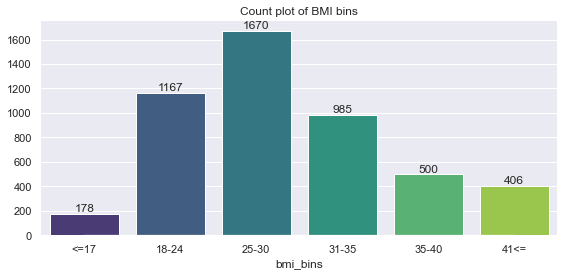

In [133]:
h.plot_countplot(bmi_pred_dataset, "bmi_bins", None, "Count plot of BMI bins")

There we can see the total numbers of observations in each bin.

In [134]:
bmi_bins_stroke = h.make_crosstab_percent(bmi_pred_dataset, "bmi_bins", "stroke")
bmi_bins_stroke

stroke,no,yes
bmi_bins,,
<=17,99.4382,0.5618
18-24,97.5150,2.4850
25-30,95.0299,4.9701
31-35,94.5178,5.4822
35-40,95.2000,4.8000
41<=,95.5665,4.4335


According to these bmi bins, there seems larger number of stroke cases appear among people with bmi from 31 to 35, but actually in all bmi bins with higher that normal bmi the percentage of strokes is quite similar - near 5 percent. In the bin of normal (under 25) bmi the percentage of stroke cases is near 2.5 percent.

* **BMI vs. all numerical variables**

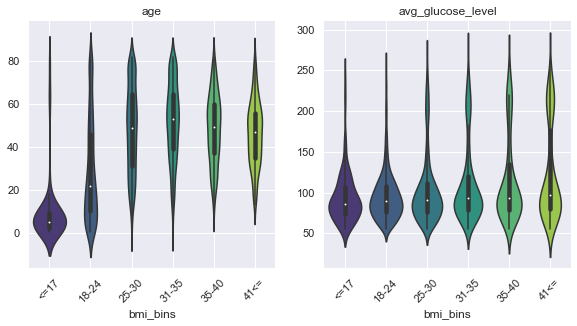

In [135]:
numerical_feat = bmi_pred_dataset[["age", "avg_glucose_level", "bmi_bins"]]
h.multiple_violinplots(numerical_feat, "bmi_bins")

So wee that the larger the bmi value, the higher the mean of age, but it is normal, as bmi for children is smaller than 18.5. But event looking in perspective from normal bmi, we can see a clear increase of age values as bmi is getting higher. And the mean and distributions of avg_glucose_level is quite similar in all the bmi bins. Seems that age could be a good predictor for bmi.

* **BMI vs. all categorical variables**

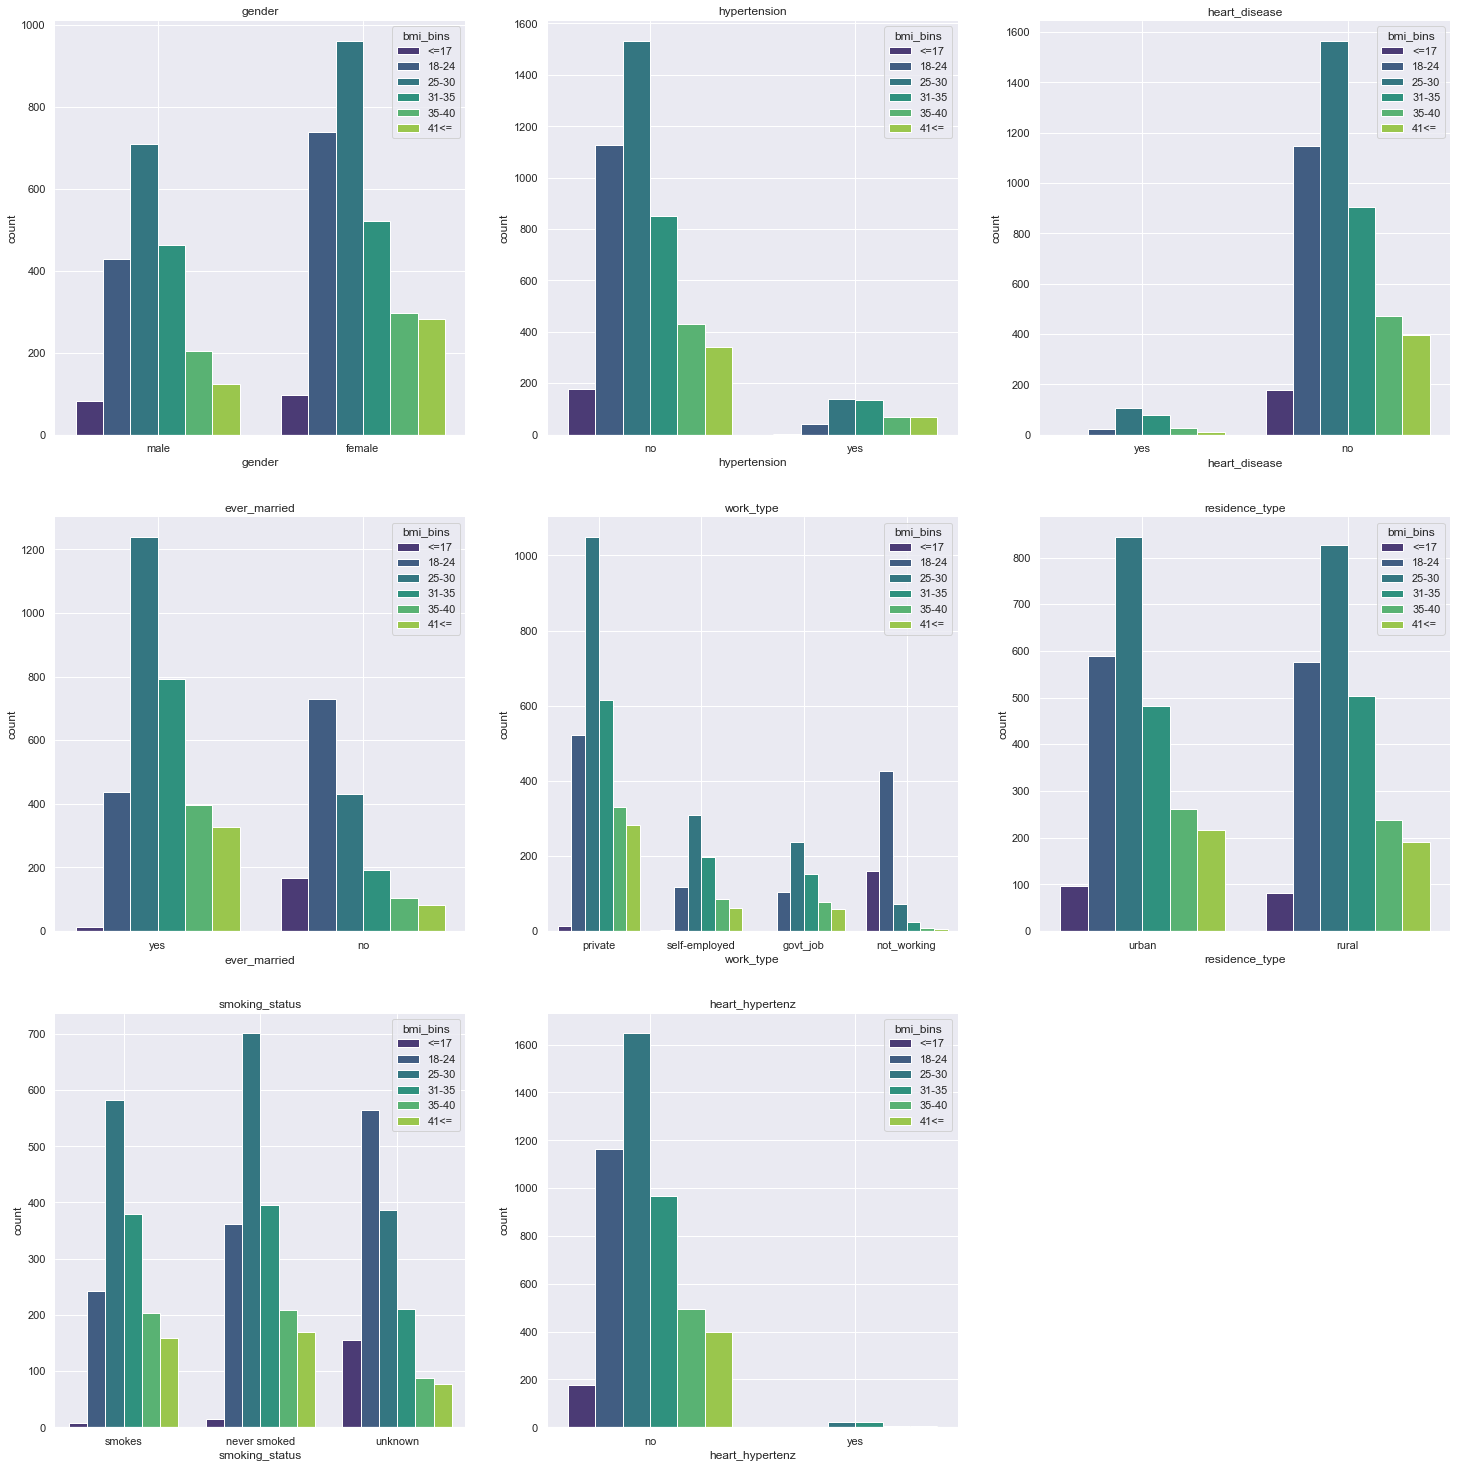

In [136]:
categorical_feat = bmi_pred_dataset[['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type',
       'smoking_status', 'heart_hypertenz', 'bmi_bins']]

h.plot_categorical_countplots(categorical_feat, "bmi_bins")

So good predictors for bmi could be:
* gender: largest groups of both have bmi between 25-30 (little overweight), more female have normal bmi;
* hypertension: no great distinctions, people with hypertension is a very small group and they have almost all values of bmi bins in quite equal size;
* heart_disease: people with heart disease tend to have bmi larger than normal (18-24), but again a very small group of them;
* ever_married: seems that more not married people have normal and even smaller bmi, than married, where we see that the largest group is with small overweight (bmi over 25) and all in all married people in all bmi bins with over weight have more observations;
* work_type: all working people have some overweight (bmi from 25), only not working (which include kinds), have largest groups of normal bmi;
* residence_type: have no affect on bmi, both distributions are very similar;
* smoking_status: only people in unknown group had largest amount of normal bmi (18-24), smokers and non smokers have largest groups of small overweight (bmi over 25).
* heart_hypertenz: too small group of yes values, but there are only small overweight (bmi over 25).

## 2.4. Dependencies between variables

**Target features:**

* stroke;
* hypertension;
* avg_glucose_level;
* bmi.

* First of all let's check the correlation heatmap for numerical features. I think there will be nothing especially interesting.

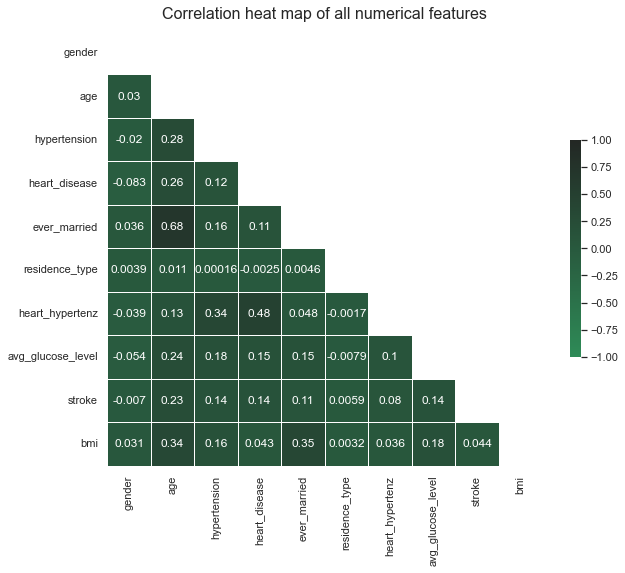

In [137]:
stroke_corr = stroke_df[
    [
        "gender",
        "age",
        "hypertension",
        "heart_disease",
        "ever_married",
        "residence_type",
        "heart_hypertenz",
        "avg_glucose_level",
        "stroke",
        "bmi",
    ]
].copy(deep=True)

stroke_corr.dropna(axis=0, inplace=True)
stroke_corr.replace({"gender":{"female":1, "male":0}}, inplace = True)
stroke_corr.replace({"residence_type":{"urban":1, "rural":0}}, inplace = True)
stroke_corr.replace({"hypertension":{"yes":1, "no":0}}, inplace = True)
stroke_corr.replace({"heart_disease":{"yes":1, "no":0}}, inplace = True)
stroke_corr.replace({"ever_married":{"yes":1, "no":0}}, inplace = True)
stroke_corr.replace({"heart_hypertenz":{"yes":1, "no":0}}, inplace = True)
stroke_corr.replace({"stroke":{"yes":1, "no":0}}, inplace = True)
h.plot_heatmap(stroke_corr, "Correlation heat map of all numerical features")

We see that some mostly features are correlated positively, the largest correlation coefficient is between ever_married and age (0.68), stroke is mostly correlated with age.BMi with age, ever_married and gender. Multicollinearity should be avoided.

* Saved two datasets: with dropped NaN values in the bmi column - bmi_pred_dataset; with filled bmi values  - filled_bmi_stoke_df.

In [138]:
bmi_pred_dataset.to_csv("bmi_pred_dataset.csv", index=False)

In [139]:
filled_bmi_stroke_df.to_csv("stroke_df_nan.csv", index=False)

# Conclusions

There is a huge data imbalance, it will be hard to predict stroke, hypertension - as the number of positive cases is very low.

* **STROKE** - you are under threat of stroke, if you have :
1. hypertension (there tend to be from 6 to 12 percent more stroke cases among people with hypertension, than without); 
2. heart diseases (there tend to be from almost 8 to 17 percent more stroke cases among people with heart diseases, than without);
3. a wife or a husband (there tend to be from 4 to 6 percent more stroke cases among married than not married people);
4. your company or you are self employed (almost 8 percent of respondents in this group had faced stroke, you are too stressed about your job probably), do not work, better relax and no stroke will occur;
5. a cigarette in your pocket and you smoke it (group of smokers with 6.7 percent of stroke cases lead);
6. lots of years of living experience in this world (the older the person, especially over 65 years, the more chances to face stroke);
7. a strong dependency on sugar and a lazy life without sports (higher glucose level in the blood (over 125 mg/dl) and bmi over 25 indicates possible diabetes, overweight and higher possibility of stroke).

But, relax, if you are a man, because, according to this dataset, the difference of stroke cases among female and male is not statistically significant and the proportions of stroke cases among women and men are actually almost equal. Also, don't worry if you live in the city or in the village: there were about 5 percent of stroke cases in both groups of the patient by their residence type.


* **Hypertension**:
female tend to have hypertension more often, but the number of women patients is larger also. Married people suffer from hypertension more often, but still there are more married patients all in all. Private and self employed work type is a risk factor for hypertension. Age is the best predictor, the older the person, the more likely he/she is to have hypertension, higher BMI also could increase the possibility of this disease.

* **Average glucose level**:
Older people tend to have higher average glucose level. We also see a little increase in men bmi as the average glucose level goes up.

* **Body mass index**: 
Most of the respondents have bmi between 25-30 (little overweight), more female have normal bmi. People with heart disease tend to have bmi larger than normal (18-24). It seems that more not married people have normal and even smaller bmi, than married (they cook and lay on the sofa too much). Age is the best predictor, older people tend to have higher bmi.